In [1]:
import numpy             as np
import matplotlib.pyplot as plt

from henri.grhd import GRHD, EOS_polytrope

# Define polytropic equation of state
eos = EOS_polytrope(
    polytropic_index = 1.0,
    rho_min          = 1.0e-9,
)

# Define grhd object
grhd = GRHD(eos=eos)

# Load TOV solution
(r_0, m_0, p_0, rho_0, R_0, alpha_0, psi_0) = np.load('data/tov_+6-6+2.npy')
# Add variables not in TOV solution with their trivial values
v_r_0    = np.zeros_like(r_0)
eps_0    = np.zeros_like(r_0)
beta_r_0 = np.zeros_like(r_0)

M_min = 50
M_max = 1600 #len(r_0)

r_0      =      r_0[M_min:M_max]
m_0      =      m_0[M_min:M_max]
p_0      =      p_0[M_min:M_max]
rho_0    =    rho_0[M_min:M_max]
R_0      =      R_0[M_min:M_max]
alpha_0  =  alpha_0[M_min:M_max]
psi_0    =    psi_0[M_min:M_max]
beta_r_0 = beta_r_0[M_min:M_max]
v_r_0    =    v_r_0[M_min:M_max]
eps_0    =    eps_0[M_min:M_max]


def solve_metric(tilde_E, tilde_S_r, tilde_S):

    alpha  = alpha_0
    beta_r = np.zeros_like(alpha_0)
    psi    = psi_0

    A_rr   = np.zeros_like(alpha_0)

    return alpha, beta_r, psi, A_rr


# Define metric solver
grhd.solve_metric = solve_metric

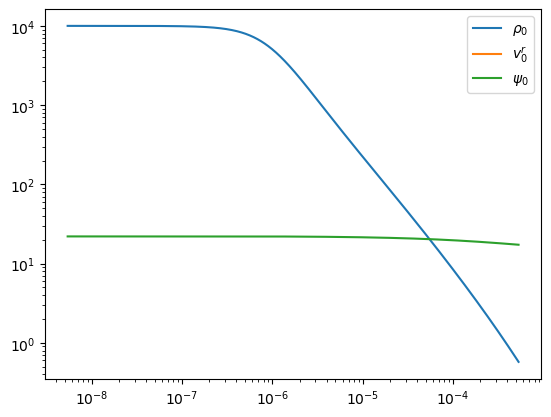

In [2]:
plt.plot(R_0, rho_0, label=r'$\rho_0$')
plt.plot(R_0, v_r_0, label=r'$v^{r}_{0}$')
plt.plot(R_0, psi_0, label=r'$\psi_0$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [3]:
grhd.evolve(r=R_0, rho_0=rho_0, v_r_0=v_r_0, psi_0=psi_0, t_evol=1.e-2)

/Users/frederikd/micromamba/envs/grhd/lib/python3.12/site-packages/scipy/optimize/_nonlin.py:374: RuntimeWarning: invalid value encountered in scalar divide
  and dx_norm/self.x_rtol <= x_norm))
